In [1]:
import pandas as pd
import numpy as np
from collections import Counter
# https://www.kaggle.com/rtatman/import-functions-from-kaggle-script
from shutil import copyfile
copyfile(src = "../input/testing-spines/test_f.py", dst = "../working/test_f.py")
from test_f import spines
import matplotlib.pyplot as plt
import seaborn as sns

# ML VS NLP
Machine learning and Natural Language Processing are two very broad terms that can cover the same areas of text analysis and processing. We're not going to try to set a fixed line between these two terms, we'll leave that to the philosophers. If you're interested in pursuing the difference between them look here: 
https://www.projectpro.io/article/machine-learning-vs-nlp/493

In [2]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [3]:
df = pd.read_csv('../input/eda-on-feedback-v1/post_eda.csv')

In [4]:
df['feedback'][30]

' thanks for share,   maybe this is just me and please do some research on it, but i think you do way to much commenting on the code (sometimes its 1 line of comment per 1 line of code) .eg. creating an empty list does not need a comment,  all the details inside the loop also do not need a comment (again that is my opinion), i would just use 1 line comment to explain the whole loop , that is it.   I would put all my imports at the top, like mentioned here: https://towardsdatascience.com/how-to-create-a-professional-github-data-science-repository-84e9607644a2   I would number all my sections and subsections   '

In [5]:
df['len'] = df['feedback'].apply(lambda x: len(x))

# sentiment analysis

Sentiment analysis is a very popular application of ML techniques


In [6]:
from pattern.en import sentiment
x = 'project looks amazing, great job'

sentiment(x)

(0.7000000000000001, 0.825)

In [7]:
y= 'plot looks terrible, spines are too small'
sentiment(y)

(-0.625, 0.7)

In [8]:
z = 'improve the comment, first line looks bad'
sentiment(z)

(-0.22499999999999992, 0.5)

In [9]:

df['sentiment'] = df['feedback_clean2_lem'].apply(lambda x: sentiment(x))
df['polarity'] = df['sentiment'].str[0]
df['subjectivity'] = df['sentiment'].str[1]
df = df.drop(columns='sentiment')
df.sort_values('polarity')

,Unnamed: 0,content,link,replies,views,feedback,title_nostop,tag,short_title,feedback_clean,feedback_clean2,temp_list,feedback_clean2_lem,len,polarity,subjectivity
423,439,"<tr class=""topic-list-item category-share-guid...",https://community.dataquest.io/t/profitable-ap...,1,194,hi @wolewani I am afraid that you did not upl...,profitable apps profiles app store google play...,350,app profitable,hi wolewani I afraid upload notebook link proj...,wolewani I afraid upload notebook link please ...,"['wolewani', 'I', 'afraid', 'upload', 'noteboo...",wolewani I afraid upload notebook link please ...,138,-0.60,0.90
208,218,"<tr class=""topic-list-item category-share-guid...",https://community.dataquest.io/t/exploring-eba...,5,123,@adetolaadeya looks like something went wrong...,ebay car salesdata guidedproject,294,ebay car,adetolaadeya looks like something went wrong u...,adetolaadeya looks something went wrong upload...,"['adetolaadeya', 'looks', 'something', 'went',...",adetolaadeya look something go wrong uploading...,180,-0.50,0.90
914,954,"<tr class=""topic-list-item category-share-guid...",https://community.dataquest.io/t/any-feedback-...,3,231,"unfortunately, your notebook file did not get...",welcome employee exit surveys,348,exit employee,unfortunately notebook file get attach post pl...,unfortunately notebook file get attach post pl...,"['unfortunately', 'notebook', 'file', 'get', '...",unfortunately notebook file get attach post pl...,691,-0.50,1.00
1024,1080,"<tr class=""topic-list-item category-share-guid...",https://community.dataquest.io/t/guided-projec...,2,214,"hi @ivelinagenova, congrats on finishing your...",cia factbook using sql review,257,cia factbook,hi ivelinagenova congrats finishing project sh...,ivelinagenova congrats finishing community use...,"['ivelinagenova', 'congrats', 'finishing', 'co...",ivelinagenova congrats finish community use ma...,575,-0.30,0.95
557,576,"<tr class=""topic-list-item category-share-guid...",https://community.dataquest.io/t/my-analysis-o...,2,243,looks good to me. I am also working on this p...,analysis popular science questions,469,science popular,looks good I also working project small thing ...,looks I working small thing noticed need run q...,"['looks', 'I', 'working', 'small', 'thing', 'n...",look I work small thing notice need run questi...,240,-0.25,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,766,"<tr class=""topic-list-item category-share-guid...",https://community.dataquest.io/t/cleaning-and-...,1,134,this is an impressive project @ctowolabi! kud...,cleaning analysing workers exit surveys,348,exit employee,impressive project ctowolabi kudos…,impressive ctowolabi kudos…,"['impressive', 'ctowolabi', 'kudos…']",impressive ctowolabi kudos…,50,1.00,1.00
385,399,"<tr class=""topic-list-item category-share-guid...",https://community.dataquest.io/t/my-guided-pro...,2,173,"hello @vorunplz, your project is very informa...",star wars survey,201,wars star,hello vorunplz project informative like way ap...,hello vorunplz informative way applied aesthet...,"['hello', 'vorunplz', 'informative', 'way', 'a...",hello vorunplz informative way apply aesthetic...,185,1.00,1.00
82,84,"<tr class=""topic-list-item category-share-guid...",https://community.dataquest.io/t/daily-euro-do...,3,137,wonderful work. keep it up,daily eurodollar exchange,529,exchange rates,wonderful work keep,wonderful keep,"['wonderful', 'keep']",wonderful keep,32,1.00,1.00
603,622,"<tr class=""topic-list-item category-share-guid...",https://community.dataquest.io/t/guided-projec...,3,176,that lapply method is what is not taught duri...,winning jeopardy r much ‘for loops’,210,jeopardy winning,lapply method taught dq r pathway taught using...,lapply method taught dq r pathway taught using...,"['lapply', 'method', 'taught', 'dq', 'r', 'pat...",lapply method taught dq r pathway teach use pa...,152,1.00,1.00


In [10]:
top15 = df['short_title'].value_counts()[:15].index
df[df['short_title'].isin(top15)].groupby('short_title')[['polarity','subjectivity']].mean().sort_values('subjectivity')

,polarity,subjectivity
short_title,,
sql using,0.227535,0.441175
cia factbook,0.232072,0.460941
car prices,0.206395,0.476976
ebay car,0.251605,0.498947
traffic heavy,0.219977,0.504832
wars star,0.250845,0.508710
news hacker,0.287964,0.509915
exit employee,0.269066,0.512406
science popular,0.276232,0.514718


# KEYWORDS

In [11]:
pip install rake-nltk

     |████████████████████████████████| 1.5 MB 401 kB/s            
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.4
    Uninstalling nltk-3.2.4:
      Successfully uninstalled nltk-3.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
preprocessing 0.1.13 requires nltk==3.2.4, but you have nltk 3.6.7 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [12]:
from rake_nltk import Rake

In [13]:
#COMMON USE
r = Rake(include_repeated_phrases=False, min_length=1, max_length=4)
text=df['feedback'][30]
r.extract_keywords_from_text(text)
# r.get_ranked_phrases()

newl = [keyword for keyword in r.get_ranked_phrases_with_scores() if keyword[0] > 5]
newl

[(13.666666666666668, 'use 1 line comment'),
 (13.666666666666668, 'comment per 1 line'),
 (9.0, 'https :// towardsdatascience'),
 (6.666666666666667, '1 line')]

In [14]:
r = Rake(include_repeated_phrases=False, min_length=1, max_length=3)
text_to_rake = df['feedback'][31]
r.extract_keywords_from_text(text_to_rake)
# r.get_ranked_phrases()
words_ranks = [keyword for keyword in r.get_ranked_phrases_with_scores() if keyword[0] > 5]
words_ranks

[(9.0, '“ professional ”'),
 (9.0, 'avoiding colloquial language'),
 (8.0, 'nicely structured project'),
 (8.0, 'also included antarctica'),
 (8.0, 'add full stops')]

In [15]:
def rake_it(text):
    r.extract_keywords_from_text(text)
    r.get_ranked_phrases()
    keyword_rank = [keyword for keyword in r.get_ranked_phrases_with_scores() if keyword[0] > 5]
    keyword_list = [keyword[1] for keyword in keyword_rank]
    return keyword_list

In [16]:
df['rake_words'] = df['feedback'].apply(lambda x: rake_it(x))

In [17]:
# function from: towardsdatascience.com/dealing-with-list-values-in-pandas-dataframes-a177e534f173
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

to_1D(df['rake_words']).value_counts()[:20]

guided project use           25
jupyter file menu            25
happy coding :)              22
everything looks nice        20
sql style guide              16
new topic button             16
first guided project         16
everything looks good        15
jupyter notebook file        14
first code cell              13
depth style guide            13
screen shot 2020             12
project looks amazing        11
project looks good           10
make proper documentation     9
automatically edit …          9
data cleaning process         9
print () function             9
personal projects share       9
profound data analysis        8
dtype: int64

In [18]:
df.explode('rake_words').value_counts()[:1]

Unnamed: 0  content                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [19]:
df

,Unnamed: 0,content,link,replies,views,feedback,title_nostop,tag,short_title,feedback_clean,feedback_clean2,temp_list,feedback_clean2_lem,len,polarity,subjectivity,rake_words
0,0,"<tr class=""topic-list-item category-share-guid...",https://community.dataquest.io/t/predicting-ho...,1,26,processing data inside a function saves memor...,house prices,240,house prices,processing data inside function saves memory v...,processing data inside function saves memory v...,"['processing', 'data', 'inside', 'function', '...",process data inside function save memory varia...,500,0.203333,0.550000,"[https :// www1, create stay inside, processin..."
1,1,"<tr class=""topic-list-item category-share-guid...",https://community.dataquest.io/t/re-upload-pro...,3,47,"hi, I have been going through your project an...",reuploadproject popular science questions,469,science popular,hi I going project thought could provide tips ...,I going thought could provide tips make better...,"['I', 'going', 'thought', 'could', 'provide', ...",I go think could provide tip make better clear...,2840,0.299097,0.478229,"[clearly marks introduction, views graph needs..."
2,2,"<tr class=""topic-list-item category-share-guid...",https://community.dataquest.io/t/gp-clean-and-...,2,53,"noticed that you are deleting objects, afte...",gp clean analyze employee exit surveys,348,exit employee,noticed deleting objects done good habit think...,noticed deleting objects done habit think star...,"['noticed', 'deleting', 'objects', 'done', 'ha...",noticed deleting object do habit think start u...,607,0.132292,0.438542,"[2 different ways, start using gc, ridiculousl..."
3,3,"<tr class=""topic-list-item category-share-guid...",https://community.dataquest.io/t/project-feedb...,5,71,think you forgot to attach your file…,popular science questions,469,science popular,think forgot attach file…,think forgot attach file…,"['think', 'forgot', 'attach', 'file…']",think forget attach file…,39,0.000000,0.000000,[]
4,4,"<tr class=""topic-list-item category-share-guid...",https://community.dataquest.io/t/guided-projec...,5,370,@gdelaserre: recategorized your topic. the ex...,answer albums vs singles without using except ...,191,sql using,gdelaserre recategorized topic except operator...,gdelaserre recategorized topic except operator...,"['gdelaserre', 'recategorized', 'topic', 'exce...",gdelaserre recategorized topic except operator...,157,-0.017857,0.410714,[exclude certain criteria]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038,1096,"<tr class=""topic-list-item category-share-guid...",https://community.dataquest.io/t/analyzing-cia...,1,544,hey. overall you did a nice job. here are som...,cia factbook using sql,257,cia factbook,hey overall nice job observationssuggestionsop...,hey overall nice job observationssuggestionsop...,"['hey', 'overall', 'nice', 'job', 'observation...",hey overall nice job observationssuggestionsop...,2861,0.122321,0.304018,"[placed enough emphasis, float )/ area_land, r..."
1039,1097,"<tr class=""topic-list-item category-share-guid...",https://community.dataquest.io/t/would-like-an...,2,173,congrats on finishing your project! i liked ...,would like opinion visualizing earnings colleg...,146,college visualizing,congrats finishing project liked seeing differ...,congrats finishing liked seeing different type...,"['congrats', 'finishing', 'liked', 'seeing', '...",congrats finish liked see different type graph...,670,0.200000,0.550000,[might also want]
1040,1099,"<tr class=""topic-list-item category-share-guid...",https://community.dataquest.io/t/analyzing-hac...,1,195,great work @burnsdillion! another idea for ...,hacker news posts user engagement,356,news hacker,great work burnsdillion another idea analysis ...,great burnsdillion another idea analysis find ...,"['great', 'burnsdillion', 'another', 'idea', '...",great burnsdillion another idea analysis find ...,742,0.349740,0.488896,"[top ten authors, top authors write, top autho..."
1041,1100,"<t

In [20]:
points_list = [point for point in df['rake_words'].str[0]]

# Frequency distribution

In [21]:
from nltk import word_tokenize

In [22]:
df['feedback_clean2_lem'] = df['feedback_clean2_lem'].astype(str)
text = df['feedback_clean2_lem'].sum()
words = word_tokenize(text)
fd = nltk.FreqDist(words)
fd.tabulate(10)

       use       cell       look    comment conclusion       data       make        add       plot      great 
       740        664        494        485        449        445        437        434        383        377 


In [23]:
pd.DataFrame(fd.most_common(30), columns=['word','count'])

,word,count
0,use,740
1,cell,664
2,look,494
3,comment,485
4,conclusion,449
5,data,445
6,make,437
7,add,434
8,plot,383
9,great,377


# Concordance
https://avidml.wordpress.com/2017/08/05/natural-language-processing-concordance/

In [24]:
text = nltk.Text(word_tokenize(df['feedback'].sum()))
text.concordance("plot", lines=10)

Displaying 10 of 150 matches:
ive precision . it is better to make plot titles bigger . about the interactiv
 '' ] what is the point of your last plot ? does it confirm your hypothesis th
ou use very similar code to create a plot – there is an opportunity to reduce 
er plots ” try to comment after each plot and not at the end so the reader doe
ur case saleprice , and after it you plot correlation only between remaining f
tation then possible and correlation plot may be have different colors and val
tting the format of the grid on your plot setting the ylabel as ‘ average traf
 line_data = series that you want to plot # start_hour = beginning hour of the
# start_hour = beginning hour of the plot **in 24hr format** # end_hour = end 
ormat** # end_hour = end hour of the plot **in 24hr format** def plot_traffic_


In [25]:
text.concordance("use", lines=10)

Displaying 10 of 390 matches:
wever the data clean-up section could use some more work . while you have given
ience domain is common place with the use of “ with our knowledge of the datasc
 could let me know what extension you use to check spellings in the markdowns .
, # # plotting graph ) . by the way , use only one hash symbol before each comm
well managed . the introduction , the use of comments and explanations given ar
 comments to your functions . you can use docstrings for this purpose in the da
 these purposes . indeed , you do not use them in this project at all . some mi
e the code comment # death star mod : use the word “ observations ” instead of 
rby . i love it ! such a cool idea to use the map and get an idea of where the 
inearity collinearity occurs when you use two or more columns in a machine lear


In [26]:
text = nltk.Text(word_tokenize(df['feedback_clean2_lem'].sum()))
text.concordance("complex", lines=10)

Displaying 10 of 28 matches:
ader easily adapt line might appear complex noticed settingwithcopywarning erro
y use comment remember comment ease complex line give comment always try code w
omehow understand line might appear complex consider add explanation every subh
cell11 line look quite long somehow complex add comment make presentable otherw
reader get follow line might appear complex always advisable provide link datas
reader understand line might appear complex consider style text present markdow
ehow challenge reader may find line complex understand output cell567 readable 
reader somehow flow line may appear complex check style subtopic asterisk think
hardly use comment remember comment complex line ease check style sub tittle bo
mprehensible use comment relatively complex piece well import library begin fir


In [27]:
words = [w for w in word_tokenize(df['feedback'].sum()) if w.isalpha()]
finder = nltk.collocations.TrigramCollocationFinder.from_words(words)
finder.ngram_fd.most_common(10)

[(('thanks', 'for', 'sharing'), 333),
 (('for', 'sharing', 'your'), 267),
 (('sharing', 'your', 'project'), 189),
 (('it', 'is', 'better'), 180),
 (('is', 'better', 'to'), 171),
 (('your', 'guided', 'project'), 141),
 (('happy', 'learning', 'hi'), 132),
 (('the', 'code', 'cell'), 129),
 (('of', 'the', 'project'), 118),
 (('the', 'good', 'work'), 116)]

In [28]:
text.vocab()

FreqDist({'use': 740, 'cell': 664, 'look': 494, 'comment': 485, 'conclusion': 449, 'data': 445, 'make': 437, 'add': 434, 'plot': 383, 'great': 377, ...})

In [29]:
text = nltk.Text(word_tokenize(df['feedback_clean2_lem'].sum()))
text.vocab()

FreqDist({'use': 740, 'cell': 664, 'look': 494, 'comment': 485, 'conclusion': 449, 'data': 445, 'make': 437, 'add': 434, 'plot': 383, 'great': 377, ...})

# setting difficulty level

In [30]:
d = {'app profitable':1,'news hacker':2,'ebay car':3,'traffic heavy':4,'exchange rates':5,'exit employee':6, 'wars star':7,
 'sql cia':8, 'cia factbook':8,'sql using':8,'science popular':9,'college visualizing':8,'gender gap':8,'nyc high':8,
'fandango ratings':10, 'markets advertise':11,'lottery addiction':12, 'spam filter':13,
'jeopardy winning':14,'car prices':15, 'house prices':16,'stock market':17,'bike rentals':18}

for key in d.keys():
    df.loc[df['short_title']==key,'level'] = d[key]
df = df[~df['level'].isnull()].copy()   
bins3 = np.array([0,8,14,19])
df["level"] = np.digitize(df["level"], bins3)

df = df.drop(labels=965)

# Query answer

In [31]:
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

stopword_list = stopwords.words('english')
dtm = CountVectorizer(max_df=0.7, min_df=5, token_pattern="[a-z']+", 
                      stop_words=stopword_list, max_features=6000) # Only top 6000 most frequently ocurring words are considered

dtm.fit(df['feedback_clean2_lem'])
dtm_mat = dtm.transform(df['feedback_clean2_lem'])
tsvd = TruncatedSVD(n_components=200)
tsvd.fit(dtm_mat)
tsvd_mat = tsvd.transform(dtm_mat)

query = "slow function solution"
query_mat = tsvd.transform(dtm.transform([query]))
dist = pairwise_distances(X=tsvd_mat, Y=query_mat, metric='cosine')
df['feedback_clean2_lem'][np.argmin(dist.flatten())]

'process data inside function save memory variable create stay inside function store memory do function important work larger datasets interested experiment httpswww1nycgovsitetlcabouttlctriprecorddatapage try clean 1 month dataset kaggle notebook look ram usage outside function inside function compare ram usage example'

In [32]:
query = "How to improve my plot?"
query_mat = tsvd.transform(dtm.transform([query]))
dist = pairwise_distances(X=tsvd_mat, Y=query_mat, metric='cosine')
df['feedback_clean2_lem'][np.argmin(dist.flatten())]

'hey elena read book nice minor detail add cell 2 5 line repeat twice difference data set name might consider put function readdata something avoid repetition cell 3 try avoid magic number function call exploredataandroid 0 3 true readability well use name argument explicitly indicate 0 3 true cell 25 go 7 7 android 4 io someone create additional column data magic number shift longer might consider create variablesconstants clear name put somewhere start something change need change one place app androidcleanedfiltered app7 0 androidfinalappendapp app iosfiltered app4 00 iosfinalappendapp cell 22 skip part check true put simply check cell 27 nice cell 34 use methodchaining numberinstalls numberinstallsreplace replace avoid repetition use regular expression cover later cell 36 38 40 42 44 46 48 etc look similar repetitive way create function great'

In [33]:
query = "make it easy to understand"
query_mat = tsvd.transform(dtm.transform([query]))
dist = pairwise_distances(X=tsvd_mat, Y=query_mat, metric='cosine')
df['feedback_clean2_lem'][np.argmin(dist.flatten())]

'hello ajbrillantes thank way provide us detailed analysis easy follow along since presentation style pretty graphs wow excellent skill data visualization urge visualization happy learn'

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [35]:
X = vectorizer.fit_transform(df['feedback'])

In [36]:
# vectorizer.get_feature_names()
analyze = vectorizer.build_analyzer()

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(df['feedback'])

x_train_dtm = vect.transform(df['feedback'])
# x_test_dtm = vect.transform(x_test)

In [38]:
vect_tunned = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.1, max_df=0.7, max_features=100)

# TFIDF

In [39]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()

tfidf_transformer.fit(x_train_dtm)
x_train_tfidf = tfidf_transformer.transform(x_train_dtm)

x_train_tfidf

<1011x6370 sparse matrix of type '<class 'numpy.float64'>'
	with 78152 stored elements in Compressed Sparse Row format>

In [40]:
# https://towardsdatascience.com/natural-language-processing-feature-engineering-using-tf-idf-e8b9d00e7e76
from sklearn.feature_extraction.text import TfidfVectorizer
documentA = 'the man went out for a walk'
documentB = 'the children sat around the fire'

bagOfWordsA = documentA.split(' ')
bagOfWordsB = documentB.split(' ')

In [41]:
uniqueWords = set(bagOfWordsA).union(set(bagOfWordsB))
numOfWordsA = dict.fromkeys(uniqueWords, 0)
for word in bagOfWordsA:
    numOfWordsA[word] += 1
numOfWordsB = dict.fromkeys(uniqueWords, 0)
for word in bagOfWordsB:
    numOfWordsB[word] += 1

In [42]:
def computeTF(wordDict, bagOfWords):
    tfDict = {}
    bagOfWordsCount = len(bagOfWords)
    for word, count in wordDict.items():
        tfDict[word] = count / float(bagOfWordsCount)
    return tfDict

In [43]:
tfA = computeTF(numOfWordsA, bagOfWordsA)
tfB = computeTF(numOfWordsB, bagOfWordsB)

In [44]:
tfB

{'children': 0.16666666666666666,
 'the': 0.3333333333333333,
 'around': 0.16666666666666666,
 'out': 0.0,
 'man': 0.0,
 'for': 0.0,
 'sat': 0.16666666666666666,
 'walk': 0.0,
 'fire': 0.16666666666666666,
 'went': 0.0,
 'a': 0.0}

In [45]:
def computeIDF(documents):
    import math
    N = len(documents)
    
    idfDict = dict.fromkeys(documents[0].keys(), 0)
    for document in documents:
        for word, val in document.items():
            if val > 0:
                idfDict[word] += 1
    
    for word, val in idfDict.items():
        idfDict[word] = math.log(N / float(val))
    return idfDict

In [46]:
idfs = computeIDF([numOfWordsA, numOfWordsB])
idfs

{'children': 0.6931471805599453,
 'the': 0.0,
 'around': 0.6931471805599453,
 'out': 0.6931471805599453,
 'man': 0.6931471805599453,
 'for': 0.6931471805599453,
 'sat': 0.6931471805599453,
 'walk': 0.6931471805599453,
 'fire': 0.6931471805599453,
 'went': 0.6931471805599453,
 'a': 0.6931471805599453}

In [47]:
def computeTFIDF(tfBagOfWords, idfs):
    tfidf = {}
    for word, val in tfBagOfWords.items():
        tfidf[word] = val * idfs[word]
    return tfidf

In [48]:
tfidfA = computeTFIDF(tfA, idfs)
tfidfB = computeTFIDF(tfB, idfs)
df_tfid = pd.DataFrame([tfidfA, tfidfB])

df_tfid

,children,the,around,out,man,for,sat,walk,fire,went,a
0,0.000000,0.0,0.000000,0.099021,0.099021,0.099021,0.000000,0.099021,0.000000,0.099021,0.099021
1,0.115525,0.0,0.115525,0.000000,0.000000,0.000000,0.115525,0.000000,0.115525,0.000000,0.000000


In [49]:
# https://towardsdatascience.com/natural-language-processing-feature-engineering-using-tf-idf-e8b9d00e7e76
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(df['feedback_clean2_lem'])
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df_skl = pd.DataFrame(denselist, columns=feature_names)
df_t = df_skl.transpose()

In [50]:
df_t = df_t.astype(float)
df_t['sum'] = df_t[df_t.columns].sum(axis=1)

In [51]:
df_t = df_t.iloc[420:,:]
df_t = df_t.iloc[:-23,:]
df_t

,0,1,2,3,4,5,6,7,8,9,...,1002,1003,1004,1005,1006,1007,1008,1009,1010,sum
aashaydabli96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.153624
ab,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142211
abayomibalogun2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.207530
abbreviate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.575339
abbreviation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.271037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zone,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.397092
zoo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.284328
zoom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.231390
zoomins,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.094549


In [52]:
df_t['sum'] = df_t.loc[:,0:1010].sum(axis=1)
df_t = df_t.sort_values('sum',ascending=False)
df_t.loc['plot'].sort_values(ascending=False).index

Index(['sum',   453,   260,    44,   612,   789,   938,   904,   604,   755,
       ...
         372,   373,   374,   375,   376,   377,   378,   379,   380,   506],
      dtype='object', length=1012)

In [53]:
df['feedback'][453]

' hey have done nice job, i liked your chart presentation, only thing if you can add comments and markdown in project it will give rich experience to reader, '

In [54]:
df['feedback_clean2_lem'][453]

'hey do nice job like chart presentation thing add comment markdown give rich experience reader'

In [55]:
rake_it(df['feedback'][453])

['give rich experience', 'done nice job']

In [56]:
df['feedback_clean2_lem'][260]

'david welcome community thanks first us job feedback hope usefull better rerun complete cell order start 1 please add conclusion summarize important insight consider use markdown explanation throughout discuss intermediate result plan next step actually I transform subheading print dataset header use dictionary create remove duplicate row others ordinary markdown cell subheading well remove “ step n ” leave name subheading forget add comment necessary explain exactly part especially function future project find article resource side hope helpful luck next project'

In [57]:
rake_it(df['feedback'][260])

['markdown explanations throughout',
 'discussing intermediate results',
 'planning next steps',
 'ordinary markdown cells']

In [58]:
df['feedback_clean2_lem'][612]

'anamariawalpole congratulation finish finish first guide explanation markdown cell look great write couple line interested select askhn showhn post best time find certain time zone idea mention time zone along conclusion otherwise first guided look great job happy learning'

In [59]:
rake_it(df['feedback'][612])

['first guided project', 'time zone along', 'certain time zone']

In [60]:
df_t[30].value_counts()

0.000000    5536
0.159454       3
0.208682       3
0.182222       2
0.100749       2
0.139438       2
0.133524       2
0.194309       1
0.134614       1
0.112457       1
0.126867       1
0.127729       1
0.120765       1
0.129534       1
0.138154       1
0.115730       1
0.140781       1
0.150497       1
0.146883       1
0.063042       1
0.168650       1
0.165249       1
0.188666       1
0.128618       1
0.106429       1
0.067900       1
0.104802       1
0.058011       1
0.064279       1
0.067032       1
0.059291       1
0.069024       1
0.081253       1
0.078740       1
0.084393       1
0.246968       1
0.087048       1
0.090449       1
0.263090       1
0.095142       1
0.089502       1
0.090934       1
0.197513       1
0.056636       1
0.102521       1
Name: 30, dtype: int64

# topic modeling
https://www.analyticsvidhya.com/blog/2016/08/beginners-guide-to-topic-modeling-in-python/

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

https://towardsdatascience.com/nlp-extracting-the-main-topics-from-your-dataset-using-lda-in-minutes-21486f5aa925


In [61]:
# Importing:
# https://www.analyticsvidhya.com/blog/2016/08/beginners-guide-to-topic-modeling-in-python/
import gensim
from gensim import corpora
import re

# compile documents
doc_complete = df['feedback_clean2_lem'][0]
docs = word_tokenize(doc_complete)
docs_out = []
docs_out.append(docs)

# Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
dictionary = corpora.Dictionary(docs_out)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in docs_out]

# Running and Trainign LDA model on the document term matrix.
Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(doc_term_matrix, num_topics=5, id2word = dictionary, passes=50, random_state=4)

# Getting results:
ldamodel.print_topics(num_topics=5, num_words=4)

[(0, '0.032*"notebook" + 0.032*"look" + 0.032*"process" + 0.032*"month"'),
 (1, '0.032*"notebook" + 0.032*"look" + 0.032*"process" + 0.032*"month"'),
 (2, '0.032*"important" + 0.032*"stay" + 0.032*"datasets" + 0.032*"process"'),
 (3,
  '0.032*"httpswww1nycgovsitetlcabouttlctriprecorddatapage" + 0.032*"process" + 0.032*"larger" + 0.032*"clean"'),
 (4, '0.113*"function" + 0.069*"inside" + 0.048*"memory" + 0.048*"ram"')]

In [62]:

# from nltk.corpus import stopwords
# from nltk.stem.wordnet import WordNetLemmatizer
# import string
# stop = set(stopwords.words('english'))
# exclude = set(string.punctuation)
# lemma = WordNetLemmatizer()
# def clean(doc):
#     stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
#     punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
#     normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
#     return normalized

# doc_clean = [clean(doc).split() for doc in doc_complete] 

In [63]:
# # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
# dictionary = corpora.Dictionary(doc_clean)
# # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
# doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

In [64]:
# ldamodel.print_topics(num_topics=2, num_words=3)

In [65]:
def get_topic(x,n):
    """
    extract list of topics given text(x) and number(n) of words for topic
    """
    docs = word_tokenize(x)
    docs_out = []
    docs_out.append(docs)
    dictionary = corpora.Dictionary(docs_out)
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in docs_out]
    Lda = gensim.models.ldamodel.LdaModel
    # Running and Trainign LDA model on the document term matrix.
    ldamodel = Lda(doc_term_matrix, num_topics=5, id2word = dictionary, passes=50, random_state=1)
    topics = ldamodel.print_topics(num_topics=5, num_words=n)
    topics_list = []
    for elm in topics:
        content = elm[1]
        no_digits = ''.join([i for i in content if not i.isdigit()])
        topics_list.append(re.findall(r'\w+', no_digits, flags=re.IGNORECASE))
    return topics_list
    

In [66]:
df['feedback_clean2_lem'][2]

'noticed deleting object do habit think start use gccollect clear memory article 2 different way clear memory python python pool maybe feel notebook loooong think example display many row always start ridiculously long notebook trim lot publishing always hard want show tell much side put much many read get end'

In [67]:
get_topic(df['feedback_clean2_lem'][2],3)

[['lot', 'trim', 'end'],
 ['publishing', 'pool', 'put'],
 ['loooong', 'different', 'way'],
 ['many', 'always', 'memory'],
 ['publishing', 'pool', 'put']]

In [68]:
df['topic_4'] = df['feedback_clean2_lem'].apply(lambda x: get_topic(x,4))
to_1D(df['topic_4']).value_counts()[:10]

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[keep, nice]                                 20
[nice, perform]                              10
[nan]                                        10
[nice]                                       10
[understand, whereever, suggestion, well]     6
[reach, use, long, fantastic]                 5
[olamideoshilalu, kindly, upload, best]       5
[review, share, please, nbviewer]             5
[story, much, tell, better]                   5
[reminder, gentle, review, aprilg]            5
dtype: int64

In [69]:
df['topic_3'] = df['feedback_clean2_lem'].apply(lambda x: get_topic(x,3))
to_1D(df['topic_3']).value_counts()[:10]

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[keep, nice]                           20
[nice]                                 11
[nice, perform]                        10
[cell]                                 10
[nan]                                  10
[share, thank, please]                  9
[plot]                                  9
[thanks]                                6
[guide, community, file]                6
[understand, whereever, suggestion]     6
dtype: int64

In [70]:
df['topic_2'] = df['feedback_clean2_lem'].apply(lambda x: get_topic(x,2))
to_1D(df['topic_2']).value_counts()[:10]

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[]                    106
[cell]                 31
[I]                    22
[keep, nice]           21
[cell, comment]        18
[cell, use]            15
[guide, community]     15
[guide, project]       14
[community, guide]     13
[nice]                 13
dtype: int64

# kmeans

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
# vectorize text:
tfidfconverter = TfidfVectorizer(max_features=5000, min_df=0.1, max_df=0.7, stop_words=stopwords.words('english'))  
X = tfidfconverter.fit_transform(df['feedback']).toarray()

# fit and label:
Kmean = KMeans(n_clusters=8, random_state=2)
Kmean.fit(X)
df['label'] = Kmean.labels_

In [72]:
df.groupby('label')['polarity'].mean()

label
0    0.405397
1    0.312328
2    0.224152
3    0.210876
4    0.143431
5    0.340016
6    0.242555
7    0.241244
Name: polarity, dtype: float64

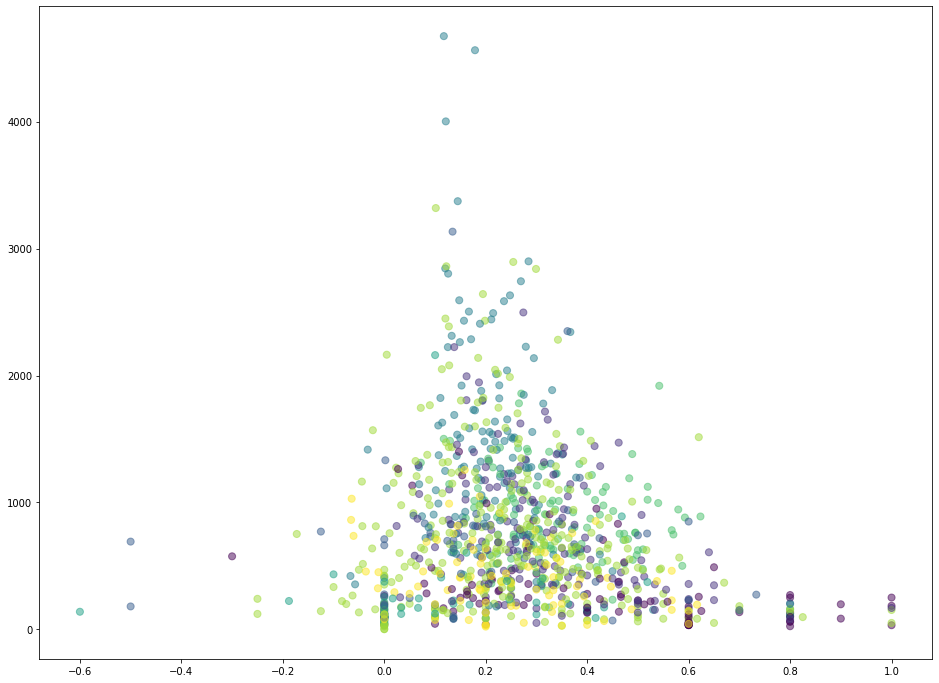

In [73]:

plt.figure(figsize=(16,12))
plt.scatter(df['polarity'], df['len'], c= df['label'], alpha=0.5, s=50)
plt.show()

In [74]:
# group data:
polar = df.groupby('label')['polarity'].mean()
subj = df.groupby('label')['subjectivity'].mean()
level = df.groupby('label')['level'].mean()
val_cnt = df['label'].value_counts()
length = df.groupby('label')['len'].mean()

# create a df:
cluster_df = pd.concat([val_cnt,polar,subj,level, length], axis=1)
cluster_df = cluster_df.rename(columns={'label':'count'})
cluster_df.index.name = 'label'
cluster_df

,count,polarity,subjectivity,level,len
label,,,,,
0,87,0.405397,0.635069,1.494253,314.287356
1,150,0.312328,0.536363,1.553333,742.253333
2,60,0.224152,0.469265,1.500000,594.266667
3,136,0.210876,0.513048,1.463235,1429.102941
4,66,0.143431,0.342580,1.469697,251.227273
5,118,0.340016,0.581554,1.296610,903.110169
6,302,0.242555,0.495008,1.450331,724.208609
7,92,0.241244,0.431905,1.521739,398.228261


In [75]:
from sklearn.feature_extraction.text import HashingVectorizer

# vectorize text with HashingVectorizer:
vectorizer = HashingVectorizer(n_features=20) 
X = vectorizer.transform(df['feedback'])

# fit and label:
Kmean = KMeans(n_clusters=8, random_state=2)
Kmean.fit(X)
df['label_hash'] = Kmean.labels_

In [76]:
# group data:
polar = df.groupby('label_hash')['polarity'].mean()
subj = df.groupby('label_hash')['subjectivity'].mean()
level = df.groupby('label_hash')['level'].mean()
val_cnt = df['label_hash'].value_counts()
length = df.groupby('label_hash')['len'].mean()

# create a df:
cluster_df = pd.concat([val_cnt,polar,subj,level, length], axis=1)
cluster_df = cluster_df.rename(columns={'label_hash':'count'})
cluster_df.index.name = 'label_hash'
cluster_df

,count,polarity,subjectivity,level,len
label_hash,,,,,
0,48,0.423195,0.634973,1.375000,162.208333
1,114,0.231643,0.458124,1.438596,286.745614
2,194,0.226182,0.493144,1.525773,1292.639175
3,133,0.292870,0.537646,1.458647,744.075188
4,184,0.299249,0.541764,1.456522,737.826087
5,78,0.275994,0.429034,1.602564,371.346154
6,134,0.241492,0.508571,1.425373,856.850746
7,126,0.244289,0.499347,1.396825,614.595238


In [77]:
df_2_neg = df[df['label'] == 2]
df_5_pos = df[df['label'] == 5]

In [78]:

rake_nums = []
rake_words = []
for cell in df_2_neg['rake_words']:
    for el in cell:

        rake_words.append(el)
        
rake_df = pd.DataFrame({'words':rake_words})
Counter(rake_df['words']).most_common(10)

[('jupyter file menu', 24),
 ('guided project use', 24),
 ('new topic button', 15),
 ('screen shot 2020', 12),
 ('automatically edit …', 9),
 ('jupyter notebook file', 2),
 ('unpaid volunteers !).', 2),
 ('let us break', 2),
 ('treat guided projects', 2),
 ('first guided project', 2)]

In [79]:
df_2_neg['short_title'].value_counts()

app profitable         13
news hacker            13
ebay car                8
cia factbook            8
college visualizing     5
car prices              3
sql using               2
bike rentals            2
fandango ratings        2
markets advertise       1
sql cia                 1
gender gap              1
exit employee           1
Name: short_title, dtype: int64

In [80]:
rake_nums = []
rake_words = []
for cell in df_5_pos['rake_words']:
    for el in cell:
        rake_words.append(el)
rake_df = pd.DataFrame({'words':rake_words})
Counter(rake_df['words']).most_common(10)

[('everything looks nice', 20),
 ('everything looks good', 9),
 ('data cleaning process', 7),
 ('print () function', 6),
 ('exploring hacker news', 6),
 ('google play markets', 5),
 ('analyzing cia factbook', 5),
 ('might appear complex', 4),
 ('looks pretty good', 4),
 ('sharing another project', 4)]

In [81]:
df_5_pos['short_title'].value_counts()

news hacker            27
ebay car               23
app profitable         15
exit employee          11
cia factbook            8
nyc high                8
college visualizing     7
traffic heavy           4
sql using               3
wars star               3
car prices              2
exchange rates          2
fandango ratings        2
lottery addiction       1
markets advertise       1
gender gap              1
Name: short_title, dtype: int64

In [82]:
# negative
df[df['label'] == 4]['short_title'].value_counts()

app profitable         12
ebay car               11
news hacker             9
nyc high                6
exit employee           5
cia factbook            5
college visualizing     4
gender gap              3
wars star               2
sql using               1
fandango ratings        1
stock market            1
spam filter             1
bike rentals            1
house prices            1
car prices              1
traffic heavy           1
jeopardy winning        1
Name: short_title, dtype: int64

In [83]:
# positive:
df[df['label'] == 6]['short_title'].value_counts()

news hacker            52
ebay car               48
app profitable         47
college visualizing    23
cia factbook           22
wars star              19
gender gap             15
exit employee          13
sql using               9
nyc high                9
traffic heavy           7
science popular         7
house prices            6
markets advertise       6
jeopardy winning        5
car prices              4
bike rentals            3
stock market            3
fandango ratings        2
exchange rates          1
lottery addiction       1
Name: short_title, dtype: int64

# Advanced clustering

In [84]:
# https://www.analyticsvidhya.com/blog/2021/09/latent-semantic-analysis-and-its-uses-in-natural-language-processing/

import nltk

from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder

from tqdm import tqdm, tqdm_notebook
##

stopword_list = stopwords.words('english')

dtm = CountVectorizer(max_df=0.7, min_df=5, token_pattern="[a-z']+", 
                      stop_words=stopword_list, max_features=6000) # Only top 6000 most frequently ocurring words are considered
dtm.fit(df['feedback_clean2_lem'])
dtm_mat = dtm.transform(df['feedback_clean2_lem'])

tsvd = TruncatedSVD(n_components=200)
tsvd.fit(dtm_mat)
tsvd_mat = tsvd.transform(dtm_mat)
s_list = []
for clus in tqdm(range(2,9)):

    km = KMeans(n_clusters=clus, n_init=50, max_iter=1000, random_state=2) # Instantiate KMeans clustering

    km.fit(tsvd_mat) # Run KMeans clustering

    s = silhouette_score(tsvd_mat, km.labels_)

    s_list.append(s)
    



100%|██████████| 7/7 [00:56<00:00,  8.11s/it]


In [85]:
df['label2'] = km.labels_
df.groupby('label2')['polarity'].mean()

label2
0    0.231958
1    0.174918
2    0.285773
3    0.279172
4    0.207528
5    0.117426
6    0.267744
7    0.361111
Name: polarity, dtype: float64

In [86]:
df['label2'].value_counts()

3    621
6    228
4     73
0     55
1     24
2      8
5      1
7      1
Name: label2, dtype: int64

In [87]:
tsne = TSNE(n_components=2)
tsne_mat = tsne.fit_transform(tsvd_mat)

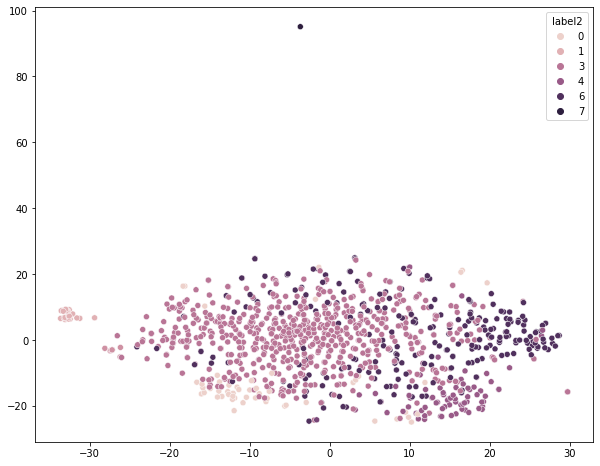

In [88]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=tsne_mat[:,0],y=tsne_mat[:,1],hue=df['label2'])
plt.show()

In [89]:
# tsne_mat.max()
result = np.where(tsne_mat == np.amax(tsne_mat))
result[0]

array([964])

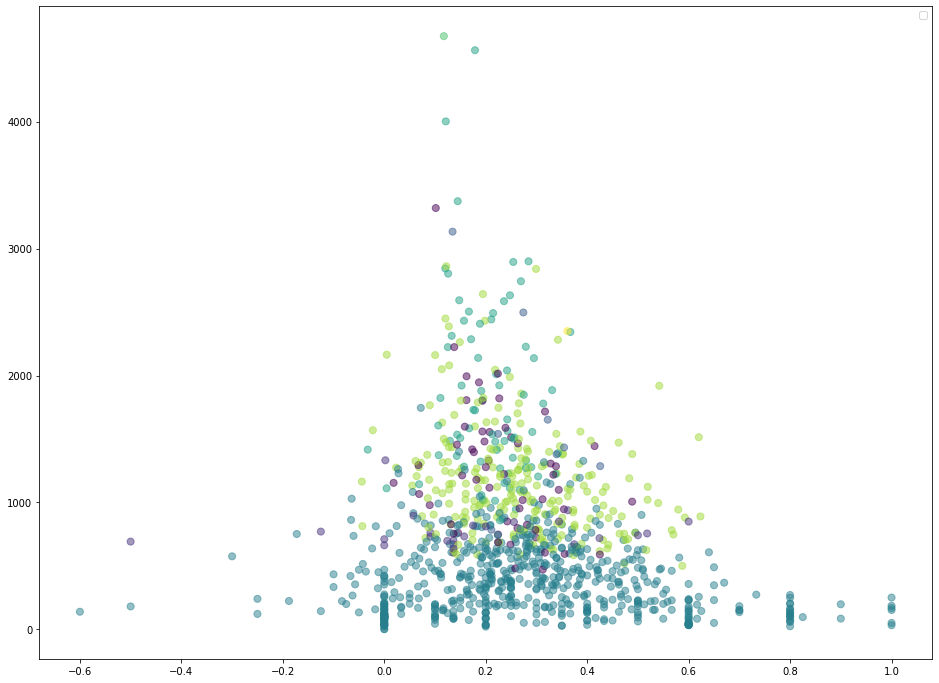

In [90]:

plt.figure(figsize=(16,12))
plt.scatter(df['polarity'], df['len'], c= df['label2'], alpha=0.5, s=50)
plt.legend()
plt.show()

In [91]:
df_2_neg = df[df['label2'] == 2]
df_6_pos = df[df['label2'] == 6]

In [92]:
rake_nums = []
rake_words = []
for cell in df_2_neg['rake_words']:
    for el in cell:

        rake_words.append(el)
        
rake_df = pd.DataFrame({'words':rake_words})
Counter(rake_df['words']).most_common(10)

[('depth style guide', 8),
 ('personal projects share', 7),
 ('make proper documentation', 7),
 ('social love attention', 7),
 ('hadley wickham nope', 7),
 ('alex olteanu ’', 7),
 ('tidyverse style guide', 7),
 ('sql style guide', 7),
 ('project looks nice', 2),
 ('reduce r …', 2)]

In [93]:
df_2_neg['short_title'].value_counts()

college visualizing    3
news hacker            2
cia factbook           2
ebay car               1
Name: short_title, dtype: int64

In [94]:
rake_nums = []
rake_words = []
for cell in df_6_pos['rake_words']:
    for el in cell:

        rake_words.append(el)
        
rake_df = pd.DataFrame({'words':rake_words})
Counter(rake_df['words']).most_common(10)

[('everything looks nice', 19),
 ('everything looks good', 10),
 ('print () function', 8),
 ('project looks good', 7),
 ('first guided project', 6),
 ('second guided project', 6),
 ('looks pretty good', 5),
 ('data cleaning process', 5),
 ('first code cell', 5),
 ('happy coding :)', 5)]

In [95]:
df_6_pos['short_title'].value_counts()

news hacker            52
ebay car               50
app profitable         38
cia factbook           15
exit employee          14
college visualizing    11
nyc high                8
gender gap              6
traffic heavy           5
wars star               5
sql using               4
fandango ratings        4
car prices              4
markets advertise       3
jeopardy winning        2
house prices            2
exchange rates          2
science popular         1
lottery addiction       1
spam filter             1
Name: short_title, dtype: int64

In [96]:
# group data:
polar = df.groupby('label2')['polarity'].mean()
subj = df.groupby('label2')['subjectivity'].mean()
level = df.groupby('label2')['level'].mean()
val_cnt = df['label2'].value_counts()
length = df.groupby('label2')['len'].mean()

# create a df:
cluster_df = pd.concat([val_cnt,polar,subj,level, length], axis=1)
cluster_df = cluster_df.rename(columns={'label2':'count'})
cluster_df.index.name = 'label2'
cluster_df

,count,polarity,subjectivity,level,len
label2,,,,,
0,55,0.231958,0.517637,1.654545,1235.509091
1,24,0.174918,0.468899,1.333333,774.416667
2,8,0.285773,0.460041,1.625000,1713.125000
3,621,0.279172,0.499833,1.499195,391.563607
4,73,0.207528,0.506360,1.520548,1842.205479
5,1,0.117426,0.382325,2.000000,4675.000000
6,228,0.267744,0.537178,1.307018,1150.350877
7,1,0.361111,0.473771,2.000000,2350.000000


# sentences 

In [97]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
from nltk import sent_tokenize
from nltk import pos_tag
import string
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# set up for cleaning and sentence tokenizing:
exclude = set(string.punctuation)
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    return punc_free

# remember this function from article no 2?
def lemmatize_it(sent):
    empty = []
    for word, tag in pos_tag(word_tokenize(sent)):
        wntag = tag[0].lower()
        wntag = wntag if wntag in ['a', 'r', 'n', 'v'] else None
        if not wntag:
            lemma = word
            empty.append(lemma)
        else:
            lemma = lemmatizer.lemmatize(word, wntag)
            empty.append(lemma)
    return ' '.join(empty)


# tokenize sentences and clean them:
doc_complete = sent_tokenize(df['feedback'].sum())
doc_clean = [clean(doc) for doc in doc_complete] 
doc_clean_lemmed = [lemmatize_it(doc) for doc in doc_clean] 

# create and fill a dataframe with sentences:
sentences = pd.DataFrame(doc_clean_lemmed)
sentences.columns = ['sent']
sentences['orig'] = doc_complete
sentences['keywords'] = sentences['orig'].apply(lambda x: rake_it(x))

In [98]:
sentences

,sent,orig,keywords
0,process data inside function save memory the v...,processing data inside a function saves memor...,"[https :// www1, create stay inside, processin..."
1,clear put effort kink would help get top,it is clear that you have put in effort but so...,[kinks would help]
2,presentation would recommend section clearly m...,presentation i would recommend having a secti...,[clearly marks introduction]
3,addition would include link viewer could downl...,"in addition, i would include a link from where...",[viewers could download]
4,data exploration section apt,the data exploration section is apt.,[data exploration section]
...,...,...,...
7535,result last query remain though,the result of the last query remain the same t...,[last query remain]
7536,relevant exclude outlier,so is it relevant to exclude the outliers?,[]
7537,thank you,thank you.,[]
7538,hi rucha definitely take look finish explore e...,hi @rucha i will definitely take look once i f...,[definitely take look]


In [99]:
# vectorize text:
tfidfconverter = TfidfVectorizer(max_features=10, min_df=0.1, max_df=0.9, stop_words=stopwords.words('english'))  
X = tfidfconverter.fit_transform(sentences['sent']).toarray()

# fit and label:
Kmean = KMeans(n_clusters=8, random_state=1)
Kmean.fit(X)
sentences['label'] = Kmean.labels_

In [100]:
sentences[sentences['sent'].str.contains('markdown')]['label'].value_counts()

0    138
2     66
1     46
3     10
4      5
5      3
7      2
6      2
Name: label, dtype: int64

In [101]:
sentences['label'].value_counts().sort_index()

0    4626
1    1959
2     737
3     137
4      35
5      34
6       7
7       5
Name: label, dtype: int64

In [102]:
to_1D(sentences[sentences['label'] == 0]['keywords']).value_counts()[:10]

everything looks nice     15
everything looks good     13
sql style guide           10
print () function          8
social love attention      7
data cleaning process      7
looks pretty good          6
screen shot 2020           5
everything looks great     5
jupyter notebook file      5
dtype: int64

In [103]:
to_1D(sentences[sentences['label'] == 2]['keywords']).value_counts()[:10]

first code cell            8
avoid code repetition      7
items (): spine            4
might appear complex       4
may appear complex         4
might consider creating    3
1st code cell              3
print () function          3
little suggestion would    3
one code cell              3
dtype: int64

In [104]:
sentences['sentiment'] = sentences['sent'].apply(lambda x: sentiment(x))
sentences['polarity'] = sentences['sentiment'].str[0]
sentences['subjectivity'] = sentences['sentiment'].str[1]
sentences = sentences.drop(columns='sentiment')

In [105]:
sentences.sort_values('polarity')['sent'][:10]

6123    section densely populated country ‘ world ’ ro...
6710    base conclusion part wherein add idea outlier ...
2760    keen typo like check introduction word ‘ post ...
5533    look before look difference opinion base educa...
6359    would like add perhaps could shorten finaldata...
4901    create another project base business model lik...
138     take look notebook suggestion base saw lot opp...
942     explain well section explore brand column base no
1006                              strictly base data felt
3454    thought base want hear markdown usage beginner...
Name: sent, dtype: object

In [106]:
sentences.sort_values('polarity',ascending=False)['sent'][:10]

6323                                 excellent work buddy
851                        otherwise code comment perfect
3916                                   everything awesome
3872      would say candidate one best share project week
4928                                     awesome job that
6156                                 assure would perfect
5871                                                 best
1308    pltfigurefigsize 154 pltsubplot121 plthisthora...
6211          best sahil hey taiwogoldayodeji mission yet
719     story tell walkthrough introduction aim use co...
Name: sent, dtype: object

In [107]:
sentences.groupby('label')['polarity'].mean()

label
0    0.220683
1    0.243046
2    0.142642
3    0.201327
4    0.123184
5    0.207571
6    0.152551
7    0.238077
Name: polarity, dtype: float64

In [108]:
to_1D(sentences[sentences['polarity'] > 0.7]['keywords']).value_counts()[:10]

everything looks great    6
happy coding hello        4
everything looks good     4
project looks great       3
happy learning !.         3
sql style guide           2
really great work         2
happy coding hi           2
great job indeed          2
good work mate            2
dtype: int64

In [109]:
to_1D(sentences[sentences['polarity'] < -0.1]['keywords']).value_counts()[:10]

visualizing earnings based     5
append ([ created_at           3
might appear complex           3
little suggestion would        3
+= points else                 2
markdown comments analyzing    2
+= 1 points_show_posts         2
may appear complex             2
used another dataset           1
dates [‘ 1950                  1
dtype: int64

In [110]:
sentences[sentences['label'] == 2]

,sent,orig,keywords,label,polarity,subjectivity
18,run code able remove it,i did run your code and i was able to remove it.,[],2,0.500000,0.625000
32,code also well formatted easy read,the code itself was also well formatted and ea...,[also well formatted],2,0.433333,0.833333
52,would consider leave space comment comment cod...,i would consider leaving space above each comm...,[],2,0.600000,1.000000
63,well remove obvious code comment read datafram...,it is better to remove some obvious code comme...,[],2,0.000000,0.500000
65,code cell 15 19 20 22 29 consider round output...,"in some code cells ([15], [19], [20], [22], [2...",[],2,-0.225000,0.700000
...,...,...,...,...,...,...
7422,think would help could make apparent markdown ...,i think it would help if you could make it mor...,[],2,0.025000,0.375000
7454,without jump code want suggest add documentati...,without jumping to the code i want to suggest ...,[],2,0.000000,0.000000
7508,select castareawater floatarealand waterlandra...,select cast(area_water as float)/area_land as ...,"[relative comparison )., float )/ area_land]",2,0.000000,0.100000
7522,like think markdown cell place get explain see...,i like to think of the markdown cells as place...,[],2,0.000000,0.000000


In [111]:
sentences['label'].sum()

4231

In [112]:
sentences['sent']

0       process data inside function save memory the v...
1                clear put effort kink would help get top
2       presentation would recommend section clearly m...
3       addition would include link viewer could downl...
4                            data exploration section apt
                              ...                        
7535                      result last query remain though
7536                             relevant exclude outlier
7537                                            thank you
7538    hi rucha definitely take look finish explore e...
7539                                      tank share code
Name: sent, Length: 7540, dtype: object

# Similar sentences

In [113]:
# https://radimrehurek.com/gensim/auto_examples/core/run_similarity_queries.html
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

from collections import defaultdict
from gensim import corpora
from gensim import models
from gensim import similarities

In [114]:
# https://radimrehurek.com/gensim/auto_examples/core/run_similarity_queries.html
from collections import defaultdict
from gensim import corpora
from gensim import similarities
from gensim import models


documents = sentences['sent']

# remove common words and tokenize
texts = [
    [word for word in document.lower().split()]
    for document in documents
]

# remove words that appear only once
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

texts = [
    [token for token in text if frequency[token] > 1]
    for text in texts
]

dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

lsi = models.LsiModel(corpus, id2word=dictionary, num_topics=10)

doc = 'add comment'
vec_bow = dictionary.doc2bow(doc.lower().split())
vec_lsi = lsi[vec_bow]  # convert the query to LSI space

index = similarities.MatrixSimilarity(lsi[corpus])  # transform corpus to LSI space and index it
sims = index[vec_lsi]  

# perform a similarity query against the corpus
# print(list(enumerate(sims)))  # print (document_number, document_similarity) 2-tuples

sims = sorted(enumerate(sims), key=lambda item: -item[1])
for doc_position, doc_score in sims:
    if doc_score > 0.95:
        print(doc_score, documents[doc_position])

0.99994206 add comment why
0.9914161 observationssuggestionsopportunities improvement add comment next result
0.968227 happen child mortality decrease
0.9678818 probably add markdown comment them
0.95932376 so maybe talk question introduction add comment whenever discover something relevant exploration


# n grams kmeans

In [115]:
# doc_complete = sent_tokenize(df['feedback_clean2_lem'].sum())
# sents = pd.DataFrame(doc_complete)
# sents.columns = ['sent']


In [116]:
from nltk.util import ngrams 
import collections

tokenized = word_tokenize(sentences['sent'].sum())
trigrams = ngrams(tokenized, 3)
trigrams_freq = collections.Counter(trigrams)
trigram_df = pd.DataFrame(trigrams_freq.most_common())
trigram_df.columns = ['trigram','count']
trigram_df['tgram'] = trigram_df['trigram'].str[0]+' '+trigram_df['trigram'].str[1]+' '+trigram_df['trigram'].str[2]

# vectorize text:
tfidfconverter = TfidfVectorizer(max_features=100, min_df=0.01, max_df=0.9, stop_words=stopwords.words('english'))  
X = tfidfconverter.fit_transform(trigram_df['tgram']).toarray()

# fit and label:
Kmean = KMeans(n_clusters=8, random_state=1)
Kmean.fit(X)
trigram_df['label'] = Kmean.labels_

In [117]:
trigram_df

,trigram,count,tgram,label
0,"(share, guide, project)",89,share guide project,1
1,"(thanks, share, project)",70,thanks share project,1
2,"(guide, project, community)",57,guide project community,1
3,"(code, cell, order)",29,code cell order,5
4,"(cell, order, start)",29,cell order start,2
...,...,...,...,...
53700,"(look, finish, explore)",1,look finish explore,2
53701,"(finish, explore, ebay)",1,finish explore ebay,2
53702,"(car, sale, datatank)",1,car sale datatank,2
53703,"(sale, datatank, share)",1,sale datatank share,2


In [118]:
trigram_df[trigram_df['label']==0][:10]

,trigram,count,tgram,label
9,"(would, like, share)",26,would like share,0
17,"(difficulty, would, like)",24,difficulty would like,0
18,"(would, like, get)",24,would like get,0
19,"(like, get, help)",24,like get help,0
21,"(help, would, like)",24,help would like,0
22,"(like, share, guide)",24,like share guide,0
194,"(code, comment, like)",8,code comment like,0
271,"(style, code, like)",7,style code like,0
272,"(code, like, hitchhiker)",7,code like hitchhiker,0
273,"(like, hitchhiker, ’)",7,like hitchhiker ’,0


In [119]:
trigram_df[trigram_df['label']==1][:10]

,trigram,count,tgram,label
0,"(share, guide, project)",89,share guide project,1
1,"(thanks, share, project)",70,thanks share project,1
2,"(guide, project, community)",57,guide project community,1
10,"(project, ’, s)",25,project ’ s,1
12,"(data, science, project)",24,data science project,1
13,"(project, community, helpful)",24,project community helpful,1
23,"(guide, project, get)",24,guide project get,1
24,"(project, get, feedback)",24,project get feedback,1
42,"(share, first, project)",17,share first project,1
43,"(thank, share, project)",17,thank share project,1


In [120]:
trigram_df[trigram_df['label']==2][:10]

,trigram,count,tgram,label
4,"(cell, order, start)",29,cell order start,2
5,"(order, start, 1)",29,order start 1,2
6,"(me, everything, look)",28,me everything look,2
7,"(upload, ipynb, file)",27,upload ipynb file,2
8,"(community, thanks, share)",26,community thanks share,2
11,"(everything, look, nice)",24,everything look nice,2
14,"(community, helpful, if)",24,community helpful if,2
15,"(helpful, if, difficulty)",24,helpful if difficulty,2
16,"(if, difficulty, would)",24,if difficulty would,2
20,"(get, help, would)",24,get help would,2


In [121]:
trigram_df[trigram_df['label']==3][:10]

,trigram,count,tgram,label
56,"(mate, good, workget)",14,mate good workget,3
79,"(good, luck, future)",12,good luck future,3
80,"(thus, render, good)",12,thus render good,3
81,"(good, workhappy, learninghi)",12,good workhappy learninghi,3
86,"(everything, look, good)",12,everything look good,3
115,"(good, work, wish)",10,good work wish,3
131,"(congratulate, good, work)",9,congratulate good work,3
184,"(thumb, buddy, good)",8,thumb buddy good,3
193,"(good, workget, suggestion)",8,good workget suggestion,3
196,"(look, good, well)",8,look good well,3


In [122]:
trigram_df[trigram_df['label']==4][:10]

,trigram,count,tgram,label
54,"(well, work, on)",14,well work on,4
187,"(look, nice, well)",8,look nice well,4
191,"(well, work, thus)",8,well work thus,4
336,"(line, well, readability)",6,line well readability,4
385,"(several, line, well)",5,several line well,4
439,"(line, well, work)",4,line well work,4
444,"(code, line, well)",4,code line well,4
518,"(nice, well, present)",4,nice well present,4
605,"(markdown, cell, well)",3,markdown cell well,4
606,"(well, work, well)",3,well work well,4


In [123]:
trigram_df[trigram_df['label']==4]['tgram'].value_counts()

well work on                     1
well say style                   1
even comment well                1
projectotherwise well wish       1
working projectotherwise well    1
                                ..
inform conclusion well           1
postcode well work               1
news postcode well               1
well dooverall project           1
well present coherent            1
Name: tgram, Length: 1287, dtype: int64

In [124]:
words = [w for w in word_tokenize(df['feedback_clean2_lem'].sum()) if w.isalpha()]
finder = nltk.collocations.TrigramCollocationFinder.from_words(words)
finder.ngram_fd.most_common(10)

[(('otherwise', 'everything', 'look'), 45),
 (('cell', 'order', 'start'), 29),
 (('upcoming', 'project', 'happy'), 28),
 (('upload', 'ipynb', 'file'), 28),
 (('best', 'upcoming', 'project'), 27),
 (('everything', 'look', 'nice'), 25),
 (('welcome', 'community', 'thanks'), 24),
 (('guide', 'community', 'helpful'), 24),
 (('community', 'helpful', 'difficulty'), 24),
 (('helpful', 'difficulty', 'get'), 24)]

# collocation

In [125]:
text1 = nltk.Text(word_tokenize(df['feedback_clean2_lem'].sum()))

In [126]:
text1.common_contexts(['spine'])

right_greatly unnecessary_graph remove_tick right_remove
unnecessary_plot remove_bar unnecessary_tick key_axspinesitems
right_figure right_congratulation right_together remove_key
use_axspinesvalues remove_axis change_axspinesvalues 4_plot
select_apply remove_legend know_axspinesvalues
belowmentioned_axspinesvalues


In [127]:
text1.common_contexts(['comment'])

consistent_place could_miscellaneous space_associate
associate_segregate space_comment comment_associate obvious_read
symbol_avoid use_remember remember_reader use_explanation liked_useful
stop_time add_function perfectly_used line_different line_death
try_great put_mean remember_ease


In [128]:
text1.similar('plot')

title graph ” way result visualization mean ax axis letter function
try could provide make better section introduction include give


In [129]:
text1.similar('comment')

conclusion cell explanation suggestion markdown aim one create look
provide link idea feel post 2 way output title observation like


In [130]:
text1.similar('use')

follow add work give helpful define do go put include link one keep
always result say used avoid useful explanation
